In [1]:
import pandas as pd

 https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf
<br> explains what each column represents
<br> TLC = Taxi and Limousine Commission

# Read Data
**Do this only once**

## Pickle DataFrame

In [2]:
import pickle

In [64]:
trip_data = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-04.csv',
                        nrows = 1000000)
#file name:
taxi_data_file_name = 'april_2019_yellow_taxi_data'

In [65]:
#save dataframe:
with open(taxi_data_file_name, 'wb') as f:
    pickle.dump(trip_data, f)

## Load DataFrame

In [12]:
#file name:
taxi_data_file_name = 'april_2019_yellow_taxi_data'

In [13]:
with open(taxi_data_file_name, 'rb') as f:
    trip_data = pickle.load(f)

# Preview Data

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
trip_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-04-01 00:04:09,2019-04-01 00:06:35,1,0.5,1,N,239,239,1,4.0,3.0,0.5,1.00,0.0,0.3,8.80,2.5
1,1,2019-04-01 00:22:45,2019-04-01 00:25:43,1,0.7,1,N,230,100,2,4.5,3.0,0.5,0.00,0.0,0.3,8.30,2.5
2,1,2019-04-01 00:39:48,2019-04-01 01:19:39,1,10.9,1,N,68,127,1,36.0,3.0,0.5,7.95,0.0,0.3,47.75,2.5
3,1,2019-04-01 00:35:32,2019-04-01 00:37:11,1,0.2,1,N,68,68,2,3.5,3.0,0.5,0.00,0.0,0.3,7.30,2.5
4,1,2019-04-01 00:44:05,2019-04-01 00:57:58,1,4.8,1,N,50,42,1,15.5,3.0,0.5,3.85,0.0,0.3,23.15,2.5


In [16]:
list(trip_data.columns)

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge']

In [17]:
# VendorID - TPEP provider - 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.
# tpep_pickup_datetime - 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.
# tpep_dropoff_datetime - The date and time when the meter was disengaged.
# passenger_count - The number of passengers in the vehicle.
# trip_distance - The elapsed trip distance in miles reported by the taximeter.
# RatecodeID - TLC Taxi Zone in which the taximeter was engaged
# store_and_fwd_flag - TLC Taxi Zone in which the taximeter was disengaged 
# PULocationID
# DOLocationID
# payment_type
# fare_amount
# extra
# mta_tax
# tip_amount
# tolls_amount
# improvement_surcharge
# total_amount
# congestion_surcharge

In [18]:
trip_data.shape # 1,000,000 rows, 18 columns

(1000000, 18)

## Check for empty/NaN/null values

In [19]:
trip_data.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

## Preview values of each column - how much is usually charged? About how much would people tip?

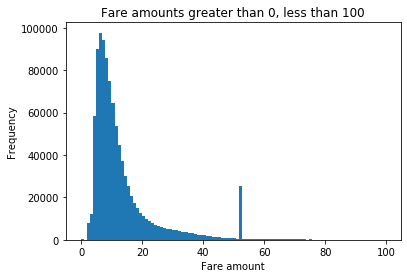

In [87]:
plt.hist(trip_data['fare_amount'][(trip_data['fare_amount'] < 100) & (trip_data['fare_amount'] > 0)],
         bins = 100);

plt.title('Fare amounts greater than 0, less than 100')
plt.xlabel('Fare amount')
plt.ylabel('Frequency')

plt.show()
# there are some outrageous values

Text(0, 0.5, 'Frequency')

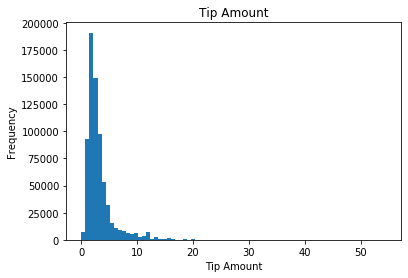

In [103]:
plt.hist(trip_data['tip_amount'][(trip_data['tip_amount'] < 55) & (trip_data['tip_amount'] > 0)],
         bins = 75);

plt.title('Tip Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')

#there are some outrageous values

In [102]:
(trip_data.tip_amount/trip_data.fare_amount > .25).sum()

425567

In [96]:
(trip_data.tip_amount > 5).sum()

88851

## Datetime the dates & times

In [20]:
import datetime
import numpy as np

In [9]:
trip_data.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [21]:
#How to get datetime format from given format
datetime.datetime.fromisoformat(trip_data.tpep_pickup_datetime[0])

datetime.datetime(2019, 4, 1, 0, 4, 9)

In [22]:
#function for one input to get hour and time
def hour_from_iso(string_here):
    return datetime.datetime.fromisoformat(string_here).hour

def datetime_from_iso(string_here):
    return datetime.datetime.fromisoformat(string_here)

In [23]:
#Create new column for pick up hour
trip_data['pickup_hour'] = trip_data['tpep_pickup_datetime'].apply(hour_from_iso)


In [24]:
trip_data['pickup_hour'][-5:]

999995    21
999996    22
999997    22
999998    22
999999    22
Name: pickup_hour, dtype: int64

In [25]:
#Create new column for drop off hour
trip_data['dropoff_hour'] = trip_data['tpep_dropoff_datetime'].apply(hour_from_iso)

In [26]:
trip_data['dropoff_hour'][:5]

0    0
1    0
2    1
3    0
4    0
Name: dropoff_hour, dtype: int64

In [27]:
trip_data['duration'] = trip_data['tpep_dropoff_datetime'].apply(datetime_from_iso) - trip_data['tpep_pickup_datetime'].apply(datetime_from_iso)



In [28]:
trip_data['duration'][:5]

0   00:02:26
1   00:02:58
2   00:39:51
3   00:01:39
4   00:13:53
Name: duration, dtype: timedelta64[ns]

In [29]:
trip_data.duration[0].total_seconds()

146.0

In [30]:
trip_data['duration_s'] = trip_data['duration'].apply(lambda x: x.total_seconds())

In [31]:
trip_data.duration_s[:5]

0     146.0
1     178.0
2    2391.0
3      99.0
4     833.0
Name: duration_s, dtype: float64

In [18]:
trip_data.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_hour,dropoff_hour,duration,duration_s
0,1,2019-04-01 00:04:09,2019-04-01 00:06:35,1,0.5,1,N,239,239,1,...,0.5,1.0,0.0,0.3,8.8,2.5,0,0,00:02:26,146.0
1,1,2019-04-01 00:22:45,2019-04-01 00:25:43,1,0.7,1,N,230,100,2,...,0.5,0.0,0.0,0.3,8.3,2.5,0,0,00:02:58,178.0


## Check linear dependency of variables

In [56]:
trip_data.fare_amount[0] + trip_data.extra[0] + trip_data.mta_tax[0] + trip_data.tip_amount[0] + trip_data.tolls_amount[0] + trip_data.improvement_surcharge[0]

8.8

In [55]:
trip_data.total_amount[0]

8.8

In [59]:
print("""total_amount = fare_amount + extra + mta_tax + tip_amount + tolls_amount + 
improvement_surcharge""")
# drop improvement surcharge?

total_amount = fare_amount + extra + mta_tax + tip_amount + tolls_amount + 
improvement_surcharge


## Check what to drop

In [74]:
list(trip_data.columns)

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_hour',
 'dropoff_hour',
 'duration',
 'duration_s']

In [75]:
trip_data['passenger_count'].value_counts() # will need to dummy this

1    723473
2    137299
5     41148
3     37521
6     24986
0     19036
4     16533
7         2
9         1
8         1
Name: passenger_count, dtype: int64

In [83]:
trip_data['trip_distance'][trip_data['trip_distance']>50].value_counts().sort_index()
# check to see if people really take taxis for over 50 miles
# they do
# even the 202.70 miles is real, but was copied an extra 2 times
# 65.20 too

50.28     1
50.91     1
51.04     1
51.20     1
51.65     1
51.69     1
51.75     1
51.97     1
52.51     1
52.70     1
53.02     1
53.20     1
53.21     1
53.23     1
53.91     1
53.99     1
54.72     1
54.76     1
56.40     1
57.14     1
57.23     1
57.64     1
58.25     1
59.10     1
59.50     1
59.61     1
59.62     1
59.99     1
60.40     1
61.00     1
61.30     1
61.60     1
62.10     1
62.50     1
63.63     1
64.14     1
64.40     1
64.43     1
64.85     1
65.20     2
65.22     1
66.20     1
72.38     1
73.31     1
74.62     1
75.65     1
78.63     1
84.70     1
88.51     1
90.86     1
127.93    1
145.42    1
202.70    3
Name: trip_distance, dtype: int64

In [86]:
trip_data['duration'][trip_data['trip_distance'] == 65.2]

205532   01:20:24
228361   00:00:20
Name: duration, dtype: timedelta64[ns]

In [88]:
trip_data['RatecodeID'].value_counts().sort_index() # need to drop 99s

1     963235
2      24773
3       1972
4        723
5       9245
6         15
99        37
Name: RatecodeID, dtype: int64

In [89]:
trip_data['store_and_fwd_flag'].value_counts() # dummy this, or drop?

N    995565
Y      4435
Name: store_and_fwd_flag, dtype: int64

In [19]:
trip_data['PULocationID'].value_counts() # dummy this? 253 values...

161    49643
237    48570
236    43509
162    42308
186    35195
       ...  
156        1
84         1
27         1
59         1
214        1
Name: PULocationID, Length: 253, dtype: int64

In [20]:
trip_data['DOLocationID'].value_counts() # dummy this? 261 values...

161    46090
236    45668
237    43652
162    33960
170    32550
       ...  
30         6
59         5
99         2
105        1
2          1
Name: DOLocationID, Length: 261, dtype: int64

In [90]:
trip_data['payment_type'].value_counts() # dummy this

1    743402
2    250085
3      4748
4      1765
Name: payment_type, dtype: int64

In [104]:
trip_data['fare_amount'].value_counts().sort_index() # drop negative values 
# and also drop unreasonably high values

-250.00     1
-135.00     1
-131.00     1
-92.00      1
-85.00      1
           ..
 428.00     1
 450.00     3
 499.00     1
 700.00     2
 3035.49    1
Name: fare_amount, Length: 3680, dtype: int64

In [109]:
trip_data['fare_amount'][trip_data['fare_amount'] > 150]
# drop above 150

10        200.0
5434      160.0
6299      499.0
6844      160.0
12134     180.0
          ...  
982451    170.0
985484    178.0
990774    158.0
994107    182.0
999424    365.0
Name: fare_amount, Length: 239, dtype: float64

In [110]:
trip_data['extra'].value_counts() # $0.50 for rush hour, $1 for overnight
# there are some other values. not sure what they mean

 0.00     326804
 2.50     178435
 0.50     160842
 1.00     154602
 3.50      88017
 3.00      83307
 4.50       4947
 7.00       2248
-0.50        384
-1.00        297
-4.50         31
 0.80         24
 1.30         14
 2.00         13
 1.80          5
-2.00          4
 0.30          3
 18.50         2
-3.50          2
 17.50         2
 2.80          2
 3.30          1
 5.30          1
-2.50          1
-0.70          1
 18.00         1
 12.50         1
-3.00          1
-2.20          1
-1.20          1
-1.70          1
 4.61          1
 5.50          1
 0.20          1
 7.22          1
 2.05          1
Name: extra, dtype: int64

In [197]:
trip_data.extra.isna().sum() # bretter drop those NaN values too

4

In [111]:
trip_data['mta_tax'].value_counts() # drop -0.5 and 3.3

 0.5    992294
 0.0      6315
-0.5      1390
 3.3         1
Name: mta_tax, dtype: int64

In [ ]:
#drop surcharge due to collinearity

In [114]:
# tolls_amount
trip_data['tolls_amount'].value_counts().sort_index()

-16.80     1
-16.14     1
-12.50     1
-12.24     1
-10.50     2
          ..
 86.12     1
 90.00     1
 95.00     2
 96.12     2
 617.00    1
Name: tolls_amount, Length: 384, dtype: int64

In [116]:
trip_data['duration'][trip_data['tolls_amount'] == 617] # check to see if that $617 outlier is real
# it actually has a chance of being real

371710   00:39:46
Name: duration, dtype: timedelta64[ns]

In [117]:
# total_amount
trip_data['total_amount'].value_counts().sort_index() # obviously continuous

-250.30     1
-138.30     1
-133.80     1
-95.30      1
-93.10      1
           ..
 497.30     1
 501.80     1
 655.30     1
 743.30     2
 3036.29    1
Name: total_amount, Length: 7480, dtype: int64

In [118]:
trip_data['duration'][trip_data['total_amount'] == 3036.29]
# checking to see if that $3k trip was real -> 27 second trip, probably mistake so drop

122512   00:00:27
Name: duration, dtype: timedelta64[ns]

## Drop Plan

In [ ]:
# Planning the cleaning

## 'VendorID', - DROP
## 'tpep_pickup_datetime', - DROP in favor of hour
## 'tpep_dropoff_datetime', - DROP in favor of hour
# 'passenger_count', - DUMMY this
## 'trip_distance', - DROP WHERE distance > 50 AND DURATION.MINUTE < 5
## 'RatecodeID', - DROP 99 THEN DUMMY
## 'store_and_fwd_flag', - DROP, 99.6% are YES and it's not relevant
# 'PULocationID', - DUMMY
# 'DOLocationID', - DUMMY
# 'payment_type', - DUMMY
## 'fare_amount', - DROP < 0 and (> 200 with duration < 1 min)
## 'extra', - DROP negatives AND NaNs
## 'mta_tax', - DROP WHERE NOT EQUAL TO 0 OR 0.5
# 'tip_amount', 
## 'tolls_amount', - DROP negatives
## 'improvement_surcharge',
# 'total_amount',
## 'congestion_surcharge',
# 'pickup_hour',
## 'dropoff_hour', - made this but probably don't need
# 'duration', will keep this in dataframe but not use this, in favor of duration_s
# 'duration_s'

# made a 'good_or_nah' column for good tip or nah

## Just drop

In [32]:
trip_data.drop(columns = ['VendorID', 
                          'improvement_surcharge',
                          'tpep_pickup_datetime',# grabbed the hour from this, which ranged 0-23
                          'tpep_dropoff_datetime',#dropped tpep dropoff datetime to avoid dependency to duration, which we made
                          'dropoff_hour',#made this but probably don't need
                          'store_and_fwd_flag',
                          'congestion_surcharge'],#drop to avoid total's dependency on this
               inplace = True)

### Drop before dummy ones

In [33]:
# can also do inplace = true

In [34]:
# drop ones where they travelled over 50 miles in less than 5 minutes
# these end up being the accidental copies
trip_data = trip_data.drop(trip_data[(trip_data['trip_distance'] >= 50) & ((trip_data['duration_s'] // 60) < 5)].index)


In [35]:
trip_data = trip_data.drop(trip_data[trip_data['RatecodeID'] == 99].index)

In [36]:
# drop where fare amount is negative
trip_data = trip_data.drop(trip_data[(trip_data['fare_amount'] < 0)].index)

In [37]:
# drop where fare amount is over $200 but the ride was less than a minute
trip_data = trip_data.drop(trip_data[(trip_data['fare_amount'] > 200) & (trip_data['duration_s'] < 60)].index)

In [38]:
# drop negative extra
trip_data['extra'] = trip_data['extra'][trip_data['extra'] >= 0]

In [39]:
# drop NaNs from extra
trip_data.dropna(axis = 0, how = 'any', subset = ['extra'], inplace = True)

In [40]:
# drop whatever mta tax isn't 0 or 0.5

#trip_data = trip_data.drop(trip_data[(trip_data['mta_tax'] != 0) or (trip_data['mta_tax'] != 0.5)].index)

#**don't run this or else the entire dataframe gets deleted for some reason. is it because
#there are no values to drop?**

In [41]:
trip_data.mta_tax.value_counts()

0.5    992267
0.0      6240
Name: mta_tax, dtype: int64

In [42]:
# all negative tolls have been dealt with from above nicely enough

In [43]:
(trip_data.tolls_amount < 0).sum()

0

In [ ]:
# congestion surcharge is dropped or else total would just be a sum of several others

### MAKE GOOD OR NAH COLUMN BEFORE DROPPING TIP AMT

Define what a good tip is as at least 25% of fare<br>
https://www.tripsavvy.com/guide-to-tipping-in-new-york-city-4177115 <br>
says usual tip is 10-20% of fare

In [44]:
# just checking with flat amounts
(trip_data.tip_amount > 3).sum() #242408

242408

In [45]:
trip_data['good_or_nah'] = (trip_data.tip_amount/trip_data.fare_amount) > 0.25

In [46]:
# finally drop tip amount

trip_data.drop(columns = ['tip_amount'], inplace = True)

## Dummies Plan

In [ ]:
# Planning the cleaning
# DOUBLE HASH ONCE PASSED INTO DUMMY COLUMN LIST
## 'VendorID', - DROP
## 'tpep_pickup_datetime', - DROP in favor of hour
## 'tpep_dropoff_datetime', - DROP in favor of hour
## 'passenger_count', - DUMMY this
## 'trip_distance', - DROP WHERE distance > 50 AND DURATION.MINUTE < 5
## 'RatecodeID', - DROP 99 THEN DUMMY
## 'store_and_fwd_flag', - DROP, 99.6% are YES and it's not relevant
## 'PULocationID', - DUMMY
## 'DOLocationID', - DUMMY
## 'payment_type', - DUMMY
## 'fare_amount', - DROP < 0 and (> 200 with duration < 1 min)
## 'extra', - DROP negatives
## 'mta_tax', - DROP WHERE NOT EQUAL TO 0 OR 0.5
## 'tip_amount', - DROPPED AFTER MAKING GOOD OR NAH
## 'tolls_amount', - DROP negatives
## 'improvement_surcharge',
# 'total_amount',
## 'congestion_surcharge',
# 'pickup_hour',
## 'dropoff_hour', - made this but don't need
# 'duration', will keep this in dataframe but not use this, in favor of duration_s
# 'duration_s'

# made a 'good_or_nah' column for good tip or nah

## Get dummies

In [47]:
trip_data = pd.get_dummies(data = trip_data, 
               columns = ['passenger_count', 'PULocationID', 'DOLocationID', 'payment_type'],
              drop_first = True)


In [48]:
# Before making dummy variables: 15 columns


In [49]:
# After making dummy variables: 535 columns
# got rid of 4 rows that had NaNs
trip_data.shape # 998507, 535

(998507, 535)

## Looking at distribution of the two classes
**Total Number of Good Tips vs. Not Good Tips**

In [50]:
trip_data.shape

(998507, 535)

In [51]:
trip_data.good_or_nah.value_counts() # 572961 False, 425546 True

False    572961
True     425546
Name: good_or_nah, dtype: int64

Text(0, 0.5, 'Quantity')

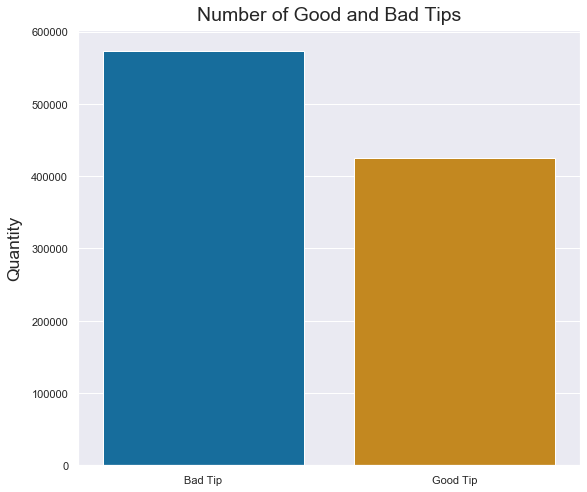

In [262]:
dist_bar = sns.barplot(orient = 'v',
                           y = trip_data.good_or_nah.value_counts(),
                           x = ['Bad Tip', 'Good Tip'],
                           palette = 'colorblind')

dist_bar.axes.set_title('Number of Good and Bad Tips', fontsize = 19.5, pad = 10) # title info
# dist_bar.set_xlabel('Distance', fontsize = 18, labelpad = 10) # xlabel info
dist_bar.set_ylabel('Quantity', fontsize = 17.5, labelpad = 9) # ylabel info

# List of input column names

In [ ]:
# Columns that will not be used: duration
# also take out the dependent variable

In [55]:
inputs = list(trip_data.columns)
inputs.remove('duration')
inputs.remove('good_or_nah')

In [56]:
inputs

['trip_distance',
 'RatecodeID',
 'fare_amount',
 'extra',
 'mta_tax',
 'tolls_amount',
 'total_amount',
 'pickup_hour',
 'duration_s',
 'passenger_count_1',
 'passenger_count_2',
 'passenger_count_3',
 'passenger_count_4',
 'passenger_count_5',
 'passenger_count_6',
 'passenger_count_7',
 'passenger_count_8',
 'passenger_count_9',
 'PULocationID_2',
 'PULocationID_3',
 'PULocationID_4',
 'PULocationID_5',
 'PULocationID_6',
 'PULocationID_7',
 'PULocationID_8',
 'PULocationID_9',
 'PULocationID_10',
 'PULocationID_11',
 'PULocationID_12',
 'PULocationID_13',
 'PULocationID_14',
 'PULocationID_15',
 'PULocationID_16',
 'PULocationID_17',
 'PULocationID_18',
 'PULocationID_19',
 'PULocationID_20',
 'PULocationID_21',
 'PULocationID_22',
 'PULocationID_23',
 'PULocationID_24',
 'PULocationID_25',
 'PULocationID_26',
 'PULocationID_27',
 'PULocationID_28',
 'PULocationID_29',
 'PULocationID_31',
 'PULocationID_32',
 'PULocationID_33',
 'PULocationID_34',
 'PULocationID_35',
 'PULocationID

# Pickle before splitting data
Random State = 52 for repeatable splits

In [52]:
# save 

taxi_data_file_name2 = 'cleaned_taxi_data'

with open(taxi_data_file_name2, 'wb') as f:
    pickle.dump(trip_data, f)

In [10]:
# load

taxi_data_file_name2 = 'cleaned_taxi_data'

with open(taxi_data_file_name2, 'rb') as f:
    trip_data = pickle.load(f)

In [54]:
trip_data

,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tolls_amount,total_amount,pickup_hour,duration,duration_s,...,DOLocationID_259,DOLocationID_260,DOLocationID_261,DOLocationID_262,DOLocationID_263,DOLocationID_264,DOLocationID_265,payment_type_2,payment_type_3,payment_type_4
0,0.50,1,4.0,3.0,0.5,0.0,8.80,0,00:02:26,146.0,...,0,0,0,0,0,0,0,0,0,0
1,0.70,1,4.5,3.0,0.5,0.0,8.30,0,00:02:58,178.0,...,0,0,0,0,0,0,0,1,0,0
2,10.90,1,36.0,3.0,0.5,0.0,47.75,0,00:39:51,2391.0,...,0,0,0,0,0,0,0,0,0,0
3,0.20,1,3.5,3.0,0.5,0.0,7.30,0,00:01:39,99.0,...,0,0,0,0,0,0,0,1,0,0
4,4.80,1,15.5,3.0,0.5,0.0,23.15,0,00:13:53,833.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2.27,1,10.0,0.5,0.5,0.0,13.80,21,00:12:06,726.0,...,0,0,0,0,0,0,0,1,0,0
999996,2.55,1,11.5,0.5,0.5,0.0,17.00,22,00:14:50,890.0,...,0,0,0,0,0,0,0,0,0,0
999997,9.35,1,37.5,0.5,0.5,0.0,49.56,22,00:48:21,2901.0,...,0,0,0,0,0,0,0,0,0,0
999998,1.91,1,8.5,0.5,0.5,0.0,12.30,22,00:09:06,546.0,...,0,0,0,0,0,0,0,1,0,0


# Split Data

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(trip_data[inputs], 
                                                    trip_data['good_or_nah'], 
                                                    random_state = 52)

## Check data after splitting

In [59]:
y_train.shape # (748880,)

(748880,)

In [60]:
x_train.shape # (748880, 533)

(748880, 533)

In [61]:
x_test.shape # (249627, 533)

(249627, 533)

In [62]:
y_test.shape # (249627,)

(249627,)

## How bad is the class imbalance?

In [63]:
# percentage of trips that give good tips: 0.426, not much class imbalance
trip_data['good_or_nah'].mean()

0.4261822901592077

# Balancing classes

In [69]:
from sklearn.utils import resample

## Combine x_train to y_train again to resample from them

In [70]:
merged = pd.concat([x_train, y_train], axis = 1)

In [71]:
n_good = (merged['good_or_nah'] == 1).sum()

In [72]:
n_nah = (merged['good_or_nah'] == 0).sum()

In [73]:
n_good # 319091

319091

In [74]:
n_nah # 429789

429789

In [75]:
merged.shape # (748880, 534)

(748880, 534)

In [76]:
# random state = 52 for repeatable results
up_the_good = resample(merged[merged['good_or_nah'] == 1], 
                       n_samples = n_nah, 
                       random_state = 52)

In [77]:
up_the_good.shape # now up_the_good has same number as n_nah (429789, 534)

(429789, 534)

In [78]:
nah = merged[merged['good_or_nah'] == 0]

In [79]:
train_set = pd.concat([up_the_good, nah], axis = 0)

In [80]:
y_train = train_set['good_or_nah']
ind_vars = list(train_set.columns)
ind_vars.remove('good_or_nah')
x_train = train_set[ind_vars]


In [81]:
x_train.head()

,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tolls_amount,total_amount,pickup_hour,duration_s,passenger_count_1,...,DOLocationID_259,DOLocationID_260,DOLocationID_261,DOLocationID_262,DOLocationID_263,DOLocationID_264,DOLocationID_265,payment_type_2,payment_type_3,payment_type_4
822086,0.73,1,5.0,0.0,0.5,0.0,9.96,10,342.0,1,...,0,0,0,0,0,0,0,0,0,0
383799,1.20,1,6.5,3.5,0.5,0.0,12.95,17,367.0,1,...,0,0,0,0,0,0,0,0,0,0
124412,1.14,1,7.0,0.0,0.5,0.0,12.36,15,486.0,1,...,0,0,0,0,0,0,0,0,0,0
185683,0.54,1,4.0,1.0,0.5,0.0,9.96,19,149.0,1,...,0,0,0,0,0,0,0,0,0,0
708056,0.96,1,6.5,0.5,0.5,0.0,12.30,20,423.0,1,...,0,0,0,0,1,0,0,0,0,0


In [82]:
y_train.head()

822086    True
383799    True
124412    True
185683    True
708056    True
Name: good_or_nah, dtype: bool

In [83]:
y_train.shape[0]/y_train.sum() # check for equal number of good and nahs

2.0

# Scale Data
Important for convergence on logistic regression when applying l1 and l2 penalties

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
minmax = MinMaxScaler()

In [84]:
x_train.shape # 859578, 533

(859578, 533)

In [86]:
x_train.head()

,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tolls_amount,total_amount,pickup_hour,duration_s,passenger_count_1,...,DOLocationID_259,DOLocationID_260,DOLocationID_261,DOLocationID_262,DOLocationID_263,DOLocationID_264,DOLocationID_265,payment_type_2,payment_type_3,payment_type_4
822086,0.73,1,5.0,0.0,0.5,0.0,9.96,10,342.0,1,...,0,0,0,0,0,0,0,0,0,0
383799,1.20,1,6.5,3.5,0.5,0.0,12.95,17,367.0,1,...,0,0,0,0,0,0,0,0,0,0
124412,1.14,1,7.0,0.0,0.5,0.0,12.36,15,486.0,1,...,0,0,0,0,0,0,0,0,0,0
185683,0.54,1,4.0,1.0,0.5,0.0,9.96,19,149.0,1,...,0,0,0,0,0,0,0,0,0,0
708056,0.96,1,6.5,0.5,0.5,0.0,12.30,20,423.0,1,...,0,0,0,0,1,0,0,0,0,0


In [85]:
minmax.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [102]:
the_cols = list(x_test.columns)
the_cols[:5]

['trip_distance', 'RatecodeID', 'fare_amount', 'extra', 'mta_tax']

In [89]:
x_train = minmax.transform(x_train)

In [105]:
x_train = pd.DataFrame(x_train, columns = the_cols)
x_train.head()

,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tolls_amount,total_amount,pickup_hour,duration_s,passenger_count_1,...,DOLocationID_259,DOLocationID_260,DOLocationID_261,DOLocationID_262,DOLocationID_263,DOLocationID_264,DOLocationID_265,payment_type_2,payment_type_3,payment_type_4
0,0.003601,0.0,0.010020,0.000000,1.0,0.0,0.015199,0.434783,0.003960,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.005920,0.0,0.013026,0.189189,1.0,0.0,0.019762,0.739130,0.004249,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.005624,0.0,0.014028,0.000000,1.0,0.0,0.018862,0.652174,0.005627,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.002664,0.0,0.008016,0.054054,1.0,0.0,0.015199,0.826087,0.001725,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.004736,0.0,0.013026,0.027027,1.0,0.0,0.018770,0.869565,0.004898,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [106]:
x_train.shape

(859578, 533)

In [97]:
x_test.shape

(249627, 533)

In [107]:
x_test = minmax.transform(x_test)

In [108]:
x_test = pd.DataFrame(x_test, columns = the_cols)

In [109]:
x_test.shape

(249627, 533)

In [110]:
x_test.head()

,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tolls_amount,total_amount,pickup_hour,duration_s,passenger_count_1,...,DOLocationID_259,DOLocationID_260,DOLocationID_261,DOLocationID_262,DOLocationID_263,DOLocationID_264,DOLocationID_265,payment_type_2,payment_type_3,payment_type_4
0,0.006660,0.0,0.015030,0.000000,1.0,0.000000,0.016481,0.565217,0.005836,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.063148,0.0,0.072144,0.000000,1.0,0.009919,0.083168,0.521739,0.020436,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.002960,0.0,0.009018,0.162162,1.0,0.000000,0.012666,0.869565,0.002663,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.018648,0.0,0.028056,0.000000,1.0,0.000000,0.031680,0.217391,0.010027,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.019734,0.0,0.033066,0.162162,1.0,0.000000,0.030978,0.000000,0.014589,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Create Models

## Logistic Regression Model

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
logreg = LogisticRegression(penalty = 'l2',
                             class_weight = 'balanced', 
                             solver = 'saga', 
                             max_iter = 250, 
                             verbose = 1,
                             n_jobs = -1)

In [123]:
logreg.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 37 epochs took 209 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.5min finished


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=250, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=1,
                   warm_start=False)

In [124]:
log_pred = logreg.predict(x_test)

In [ ]:
#### l1 penalty

In [125]:
logreg2 = LogisticRegression(penalty = 'l1',
                             class_weight = 'balanced', 
                             solver = 'saga', 
                             max_iter = 250, 
                             verbose = 1,
                             n_jobs = -1)

In [126]:
logreg2.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 2577 seconds


/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 43.0min finished


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=250, multi_class='auto', n_jobs=-1, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=1,
                   warm_start=False)

In [127]:
log_pred2 = logreg2.predict(x_test)

## Evaluate Logistic Regression Model

In [47]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
### ============================ l2 penalty

In [128]:
accuracy_score(y_test, log_pred) 

0.7994327536684733

In [129]:
f1_score(y_test, log_pred)

0.8030401378447595

In [130]:
### ============================ l1 penalty

In [131]:
accuracy_score(y_test, log_pred2) 

0.9117363105753785

In [132]:
f1_score(y_test, log_pred2) 

0.9030318767356603

## Random Forest Model

### Create objects to test hyperparameters

random_state = 52 to get reproduceable results

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier(random_state = 52, n_jobs = -1, class_weight = 'balanced')

In [28]:
from sklearn.model_selection import GridSearchCV

In [40]:
params_to_test = {'n_estimators': [10, 20, 30]#[100,300,500], #this took too long and crashed after several hours so decrease the number
#                   'max_depth': [5,10,15,20, None],
                  }

In [41]:
grid = GridSearchCV(estimator = rf, 
                    param_grid = params_to_test, 
                    scoring = 'f1',
                    n_jobs = -1,
                    cv = 2,
                    verbose = 1)

In [42]:
grid.fit(X = x_train, y = y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  5.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  5.3min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=52,
                              

In [43]:
grid.best_params_

{'n_estimators': 30}

In [39]:
# results for 1,3,10 estimators
grid.cv_results_

{'mean_fit_time': array([43.61681056, 42.84410346, 46.27278304]),
 'std_fit_time': array([0.10291648, 0.12125647, 0.2936132 ]),
 'mean_score_time': array([11.6168735 , 11.6592406 ,  6.56474745]),
 'std_score_time': array([0.00277972, 0.09892452, 0.18589437]),
 'param_n_estimators': masked_array(data=[1, 3, 10],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 1}, {'n_estimators': 3}, {'n_estimators': 10}],
 'split0_test_score': array([0.88598396, 0.92531141, 0.9498536 ]),
 'split1_test_score': array([0.86817644, 0.91519897, 0.94656946]),
 'mean_test_score': array([0.8770802 , 0.92025519, 0.94821153]),
 'std_test_score': array([0.00890376, 0.00505622, 0.00164207]),
 'rank_test_score': array([3, 2, 1], dtype=int32)}

In [45]:
# results for 10, 20, 30 estimators in the forest
grid.cv_results_

{'mean_fit_time': array([118.12381303, 159.62323451, 145.49761808]),
 'std_fit_time': array([0.90849698, 0.06214237, 0.16729987]),
 'mean_score_time': array([32.53246105, 26.43195534, 14.35073793]),
 'std_score_time': array([0.18373287, 0.13097954, 0.11526906]),
 'param_n_estimators': masked_array(data=[10, 20, 30],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10}, {'n_estimators': 20}, {'n_estimators': 30}],
 'split0_test_score': array([0.9498536 , 0.9553242 , 0.95615397]),
 'split1_test_score': array([0.94656946, 0.95103802, 0.9534162 ]),
 'mean_test_score': array([0.94821153, 0.95318111, 0.95478508]),
 'std_test_score': array([0.00164207, 0.00214309, 0.00136888]),
 'rank_test_score': array([3, 2, 1], dtype=int32)}

### Optimizing for accuracy

In [255]:
grid2 = GridSearchCV(estimator = rf, 
                     param_grid = params_to_test, 
                     scoring = 'accuracy',
                     n_jobs = -1,
                     cv = 2,
                     verbose = 1)

In [256]:
grid2.fit(X = x_train, y = y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  6.5min finished
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  6.5min remaining:    0.0s


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=52,
                              

In [257]:
grid2.cv_results_ # same results, 30 estimators is best out of 10,20,30

{'mean_fit_time': array([159.55684507, 205.95349705, 175.7021656 ]),
 'std_fit_time': array([1.49923313, 2.09471095, 0.18153644]),
 'mean_score_time': array([33.74942458, 31.22780895, 13.29429841]),
 'std_score_time': array([0.64995348, 0.52250791, 0.42292643]),
 'param_n_estimators': masked_array(data=[10, 20, 30],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10}, {'n_estimators': 20}, {'n_estimators': 30}],
 'split0_test_score': array([0.94947288, 0.95478014, 0.9555689 ]),
 'split1_test_score': array([0.94601537, 0.95028956, 0.95267678]),
 'mean_test_score': array([0.94774413, 0.95253485, 0.95412284]),
 'std_test_score': array([0.00172876, 0.00224529, 0.00144606]),
 'rank_test_score': array([3, 2, 1], dtype=int32)}

### Create object using best of the selected

In [134]:
rf_train_only = RandomForestClassifier(n_estimators = 30, 
                                       random_state = 52, 
                                       n_jobs = -1, 
                                       class_weight = 'balanced')

In [135]:
rf_train_only.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=52, verbose=0,
                       warm_start=False)

## Save Random Forest Model

In [91]:
# save 

rf_taxi_model_name = 'rf_taxi_model'

with open(rf_taxi_model_name, 'wb') as f:
    pickle.dump(rf_train_only, f)

In [4]:
# load

rf_taxi_model_name = 'rf_taxi_model'

with open(rf_taxi_model_name, 'rb') as f:
    rf_train_only = pickle.load(f)

### Feature importance with everything split

In [51]:
importances = rf_train_only.feature_importances_

In [52]:
len(importances)

533

In [65]:
inputs;
len(inputs)

533

In [96]:
sorted_impor = sorted(zip(inputs,importances), key = lambda x: x[1], reverse = True)
sorted_impor[:20]

[('total_amount', 0.26025267169986244),
 ('payment_type_2', 0.22656557123977145),
 ('fare_amount', 0.124924497814652),
 ('duration_s', 0.10279784960592696),
 ('trip_distance', 0.08324134261903572),
 ('pickup_hour', 0.03867859270086176),
 ('extra', 0.017282553969087844),
 ('tolls_amount', 0.0067497298896805145),
 ('RatecodeID', 0.005071645231988823),
 ('passenger_count_1', 0.0045276631377680334),
 ('PULocationID_138', 0.004185345763517944),
 ('passenger_count_2', 0.003497642829906739),
 ('PULocationID_132', 0.0032163858286687152),
 ('payment_type_3', 0.0030892778454320083),
 ('passenger_count_3', 0.001931500391133175),
 ('passenger_count_5', 0.001897529750232875),
 ('DOLocationID_138', 0.0017862494687634026),
 ('PULocationID_237', 0.0015330135064189924),
 ('PULocationID_161', 0.0014770307688928017),
 ('PULocationID_236', 0.001445537759790074)]

### Find importance of each categorical feature

In [57]:
passenger_start = inputs.index('passenger_count_1')
passenger_end = inputs.index('passenger_count_9')

pickup_loc_start = inputs.index('PULocationID_2')
pickup_loc_end = inputs.index('PULocationID_265')

dropoff_loc_start = inputs.index('DOLocationID_2')
dropoff_loc_end = inputs.index('DOLocationID_265')

pay_start = inputs.index('payment_type_2')
pay_end = inputs.index('payment_type_4')

In [59]:
import numpy as np

In [251]:
def eu_norm(importances):
    """finds the euclidean norm of a vector or array, calculated as
    the square root of the sum of squares of each element"""
    return np.sqrt((importances**2).sum())

In [74]:
n_passengers_importance = eu_norm(importances[passenger_start : passenger_end])
n_passengers_importance

0.006580444420434989

In [75]:
pickup_loc_importance = eu_norm(importances[pickup_loc_start : pickup_loc_end])
pickup_loc_importance

0.008428068716357739

In [76]:
dropoff_loc_importance = eu_norm(importances[dropoff_loc_start : dropoff_loc_end])
dropoff_loc_importance

0.006737459539417845

In [77]:
pay_type_importance = eu_norm(importances[pay_start : pay_end])
pay_type_importance

0.22658663179634014

In [79]:
importances[passenger_start : passenger_end].sum(), importances[pay_start : pay_end].sum()

(0.014380278683751956, 0.22965484908520345)

In [80]:
inputs

['trip_distance',
 'RatecodeID',
 'fare_amount',
 'extra',
 'mta_tax',
 'tolls_amount',
 'total_amount',
 'pickup_hour',
 'duration_s',
 'passenger_count_1',
 'passenger_count_2',
 'passenger_count_3',
 'passenger_count_4',
 'passenger_count_5',
 'passenger_count_6',
 'passenger_count_7',
 'passenger_count_8',
 'passenger_count_9',
 'PULocationID_2',
 'PULocationID_3',
 'PULocationID_4',
 'PULocationID_5',
 'PULocationID_6',
 'PULocationID_7',
 'PULocationID_8',
 'PULocationID_9',
 'PULocationID_10',
 'PULocationID_11',
 'PULocationID_12',
 'PULocationID_13',
 'PULocationID_14',
 'PULocationID_15',
 'PULocationID_16',
 'PULocationID_17',
 'PULocationID_18',
 'PULocationID_19',
 'PULocationID_20',
 'PULocationID_21',
 'PULocationID_22',
 'PULocationID_23',
 'PULocationID_24',
 'PULocationID_25',
 'PULocationID_26',
 'PULocationID_27',
 'PULocationID_28',
 'PULocationID_29',
 'PULocationID_31',
 'PULocationID_32',
 'PULocationID_33',
 'PULocationID_34',
 'PULocationID_35',
 'PULocationID

In [83]:
continuous_impor = list(zip(inputs[0:passenger_start], importances[0:passenger_start]))
continuous_impor

[('trip_distance', 0.08324134261903572),
 ('RatecodeID', 0.005071645231988823),
 ('fare_amount', 0.124924497814652),
 ('extra', 0.017282553969087844),
 ('mta_tax', 0.0009162257639064709),
 ('tolls_amount', 0.0067497298896805145),
 ('total_amount', 0.26025267169986244),
 ('pickup_hour', 0.03867859270086176),
 ('duration_s', 0.10279784960592696)]

In [84]:
categor_impor = [('n_passengers', n_passengers_importance),
                 ('pickup_loc', pickup_loc_importance),
                 ('dropoff_loc', dropoff_loc_importance),
                 ('payment_type', pay_type_importance)]

[('n_passengers', 0.006580444420434989),
 ('pickup_loc', 0.008428068716357739),
 ('dropoff_loc', 0.006737459539417845),
 ('payment_type', 0.22658663179634014)]

In [89]:
all_importance = []
all_importance.extend(continuous_impor)
all_importance.extend(categor_impor)
sorted(all_importance, key = lambda x: x[1], reverse = True)

[('total_amount', 0.26025267169986244),
 ('payment_type', 0.22658663179634014),
 ('fare_amount', 0.124924497814652),
 ('duration_s', 0.10279784960592696),
 ('trip_distance', 0.08324134261903572),
 ('pickup_hour', 0.03867859270086176),
 ('extra', 0.017282553969087844),
 ('pickup_loc', 0.008428068716357739),
 ('tolls_amount', 0.0067497298896805145),
 ('dropoff_loc', 0.006737459539417845),
 ('n_passengers', 0.006580444420434989),
 ('RatecodeID', 0.005071645231988823),
 ('mta_tax', 0.0009162257639064709)]

In [ ]:
# Decided to not combine each category when viewing feature importances

In [116]:
unzipped_fi = list(zip(*sorted_impor[:10])) # unzipped sorted feature importances top 10
unzipped_fi[0] = list(map(lambda x: x.title(), unzipped_fi[0]))
unzipped_fi

[['Total_Amount',
  'Payment_Type_2',
  'Fare_Amount',
  'Duration_S',
  'Trip_Distance',
  'Pickup_Hour',
  'Extra',
  'Tolls_Amount',
  'Ratecodeid',
  'Passenger_Count_1'],
 (0.26025267169986244,
  0.22656557123977145,
  0.124924497814652,
  0.10279784960592696,
  0.08324134261903572,
  0.03867859270086176,
  0.017282553969087844,
  0.0067497298896805145,
  0.005071645231988823,
  0.0045276631377680334)]

### Plot feature importance

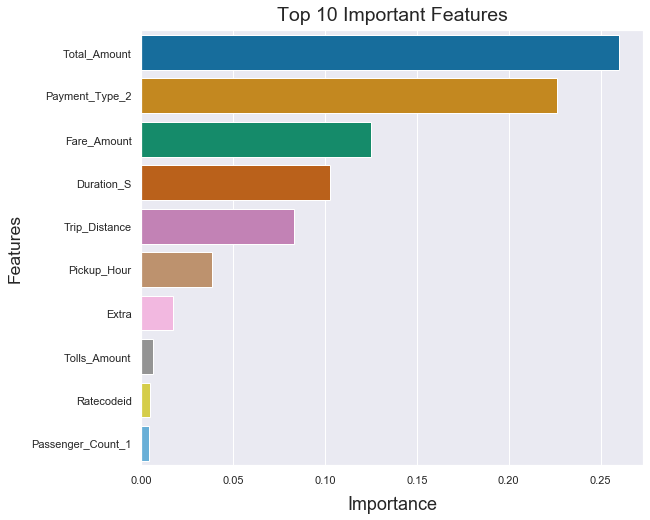

In [129]:
sns.set_style(style = 'darkgrid')
sns.set(rc = {'figure.figsize':(9,8)}) # change graph size

fi_bar = sns.barplot(orient = 'h', 
                     y = unzipped_fi[0], 
                     x = list(unzipped_fi[1]),
                     palette = 'colorblind')

fi_bar.axes.set_title('Top 10 Important Features', fontsize = 19.5, pad = 10) # title info
fi_bar.set_xlabel('Importance', fontsize = 18, labelpad = 10) # xlabel info
fi_bar.set_ylabel('Features', fontsize = 17.5, labelpad = 9) # ylabel info


fig = fi_bar.get_figure()
fig.savefig("top_10_taxi_features.png") # save as png file

#### Total Cost In Determining Good Tip Or Not

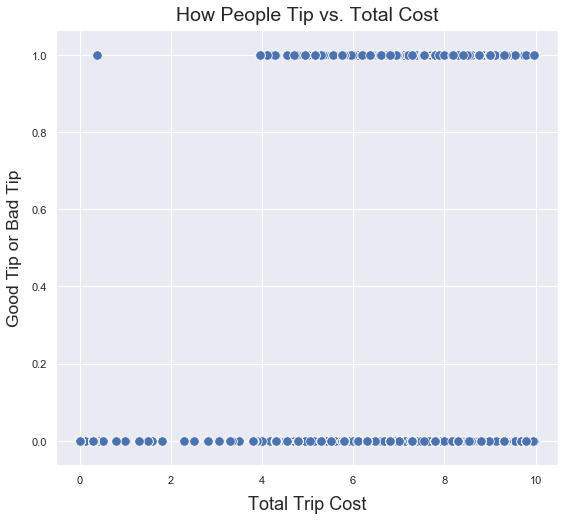

In [155]:
# looking at how people tip depending on total amount
total_to_g_n = sns.scatterplot(x = trip_data.total_amount[trip_data.total_amount<10], 
                               y = trip_data.good_or_nah[trip_data.total_amount<10],
                               s = 90)

total_to_g_n.axes.set_title('How People Tip vs. Total Cost', fontsize = 19.5, pad = 10) # title info
total_to_g_n.set_xlabel('Total Trip Cost', fontsize = 18, labelpad = 10) # xlabel info
total_to_g_n.set_ylabel('Good Tip or Bad Tip', fontsize = 17.5, labelpad = 9) # ylabel info

fig2 = total_to_g_n.get_figure()
fig2.savefig("tip_well_vs_total.png") # save as png file

#### Paying in cash to determine good tip or not

In [171]:
pay_cash = (trip_data.good_or_nah[trip_data.payment_type_2 == True]).mean()
pay_cash

# looks like if someone paid in cash, the tip would not be recorded - doesn't tell us much
# if they do pay in cash then

7.60079048221015e-05

In [172]:
pay_not_cash = (trip_data.good_or_nah[trip_data.payment_type_2 == False]).mean()
pay_not_cash

0.5684812827223382

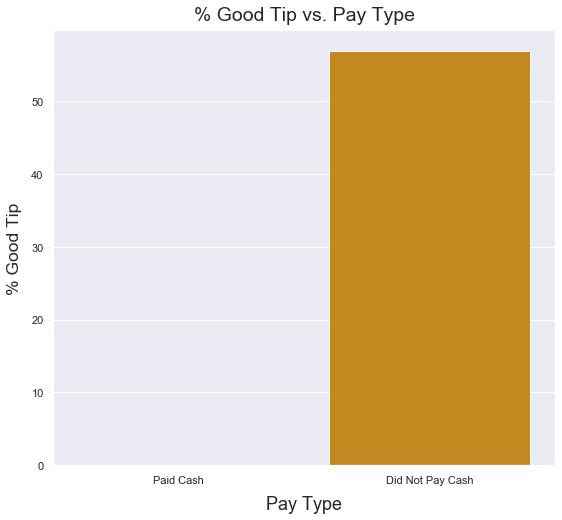

In [192]:
paytype_bar = sns.barplot(orient = 'v', 
                          y = [pay_cash*100, pay_not_cash*100], 
                          x = ['Paid Cash', 'Did Not Pay Cash'],
                          palette = 'colorblind')

paytype_bar.axes.set_title('% Good Tip vs. Pay Type', fontsize = 19.5, pad = 10) # title info
paytype_bar.set_xlabel('Pay Type', fontsize = 18, labelpad = 10) # xlabel info
paytype_bar.set_ylabel('% Good Tip', fontsize = 17.5, labelpad = 9) # ylabel info

fig4 = paytype_bar.get_figure()
fig4.savefig("percentgood_vs_paytype.png") # save as png file

#### Duration of trip - Good or not good tip

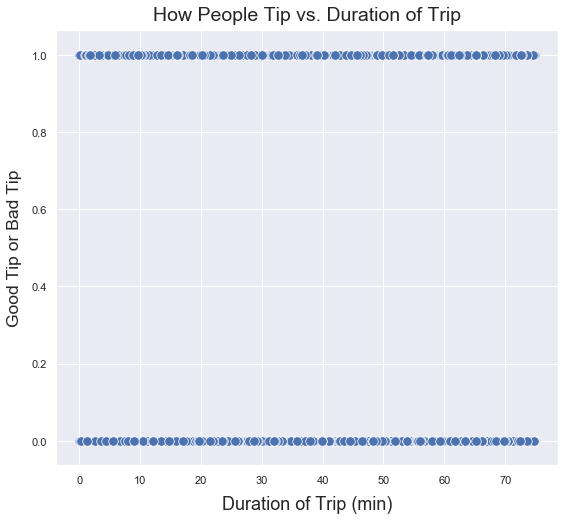

In [188]:
# looking at how people tip depending on duration of trip
duration_to_g_n = sns.scatterplot(x = trip_data.duration_s[trip_data.duration_s<4500]/60, 
                                  y = trip_data.good_or_nah[trip_data.duration_s<4500],
                                  s = 90)

duration_to_g_n.axes.set_title('How People Tip vs. Duration of Trip', fontsize = 19.5, pad = 10) # title info
duration_to_g_n.set_xlabel('Duration of Trip (min)', fontsize = 18, labelpad = 10) # xlabel info
duration_to_g_n.set_ylabel('Good Tip or Bad Tip', fontsize = 17.5, labelpad = 9) # ylabel info

fig3 = duration_to_g_n.get_figure()
fig3.savefig("tip_well_vs_duration.png") # save as png file

In [ ]:
# looking at how people tip depending on duration of trip

In [209]:
durat1 = trip_data.good_or_nah[trip_data.duration_s < 600].mean()
durat1

0.5127350820966362

In [210]:
durat2 = trip_data.good_or_nah[(trip_data.duration_s >= 600) & (trip_data.duration_s < 1200)].mean()
durat2

0.46085432652174413

In [211]:
durat3 = trip_data.good_or_nah[(trip_data.duration_s >= 1200) & (trip_data.duration_s < 1800)].mean()
durat3

0.21175824685668332

In [212]:
durat4 = trip_data.good_or_nah[(trip_data.duration_s >= 1800)].mean()
durat4

0.199780367404817

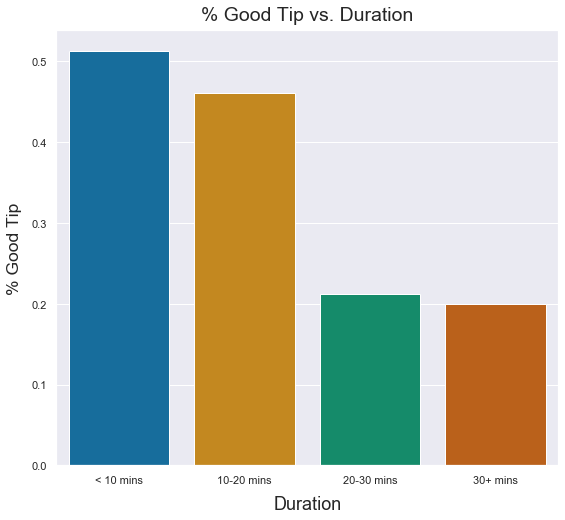

In [214]:
duration_bar = sns.barplot(orient = 'v',
                           y = [durat1,durat2,durat3,durat4],
                           x = ['< 10 mins', '10-20 mins', '20-30 mins', '30+ mins'],
                           palette = 'colorblind')

duration_bar.axes.set_title('% Good Tip vs. Duration', fontsize = 19.5, pad = 10) # title info
duration_bar.set_xlabel('Duration', fontsize = 18, labelpad = 10) # xlabel info
duration_bar.set_ylabel('% Good Tip', fontsize = 17.5, labelpad = 9) # ylabel info


fig5 = duration_bar.get_figure()
fig5.savefig("goodtip_per_duration.png") # save as png file

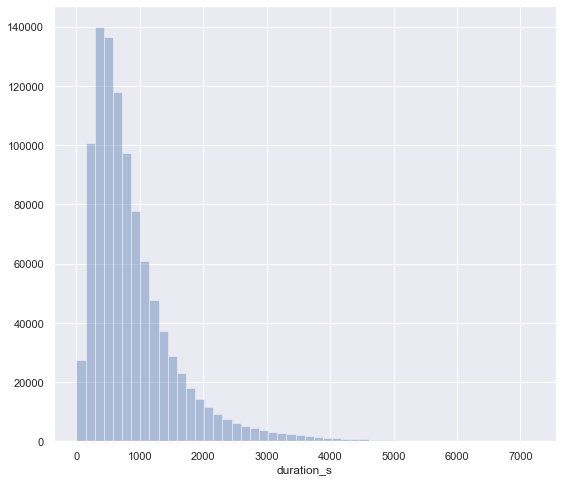

In [219]:
sns.distplot(trip_data['duration_s'][trip_data.duration_s < 7200], kde = False)

#### Duration of trip

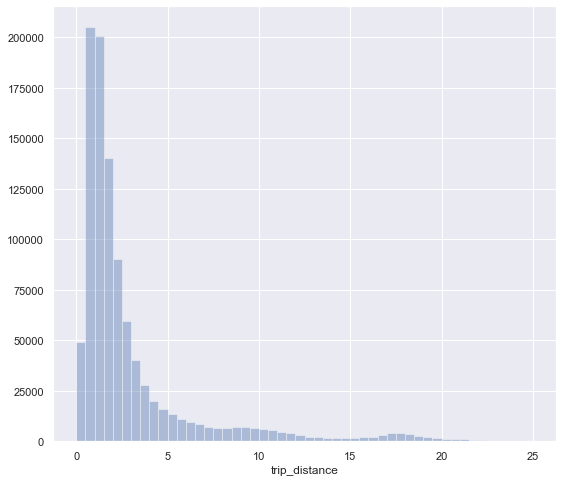

In [222]:
sns.distplot(trip_data.trip_distance[trip_data.trip_distance < 25], kde = False)

In [230]:
dist1 = trip_data.good_or_nah[trip_data.trip_distance < 0.5].mean()
dist1

0.4146281899955228

In [231]:
dist2 = trip_data.good_or_nah[(trip_data.trip_distance >= 0.5) & (trip_data.trip_distance < 1)].mean()
dist2

0.5245065998068349

In [232]:
dist3 = trip_data.good_or_nah[(trip_data.trip_distance >= 1) & (trip_data.trip_distance < 1.5)].mean()
dist3

0.5228736004787672

In [233]:
dist4 = trip_data.good_or_nah[(trip_data.trip_distance >= 1.5) & (trip_data.trip_distance < 2)].mean()
dist4

0.4937797748328337

In [234]:
dist5 = trip_data.good_or_nah[(trip_data.trip_distance >= 2) & (trip_data.trip_distance < 3)].mean()
dist5

0.4265868518938232

In [235]:
dist6 = trip_data.good_or_nah[(trip_data.trip_distance >= 3) & (trip_data.trip_distance < 4)].mean()
dist6

0.30509624603584334

In [236]:
dist7 = trip_data.good_or_nah[(trip_data.trip_distance >= 4)].mean()
dist7

0.20894348364851031

Text(0, 0.5, '% Good Tip')

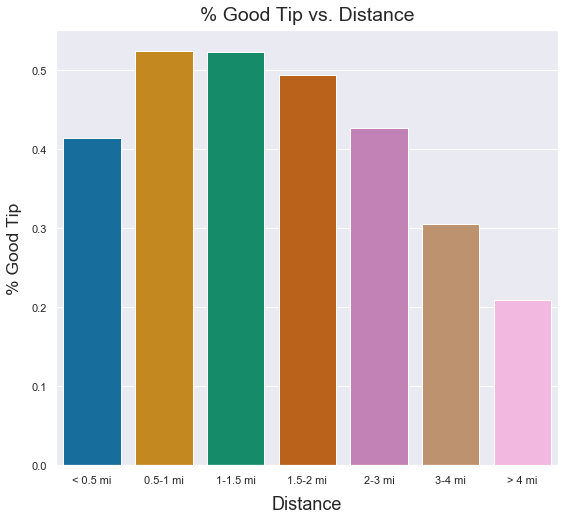

In [239]:
dist_bar = sns.barplot(orient = 'v',
                           y = [dist1,dist2,dist3,dist4,dist5,dist6,dist7],
                           x = ['< 0.5 mi', '0.5-1 mi', '1-1.5 mi', '1.5-2 mi', '2-3 mi', '3-4 mi', '> 4 mi'],
                           palette = 'colorblind')

dist_bar.axes.set_title('% Good Tip vs. Distance', fontsize = 19.5, pad = 10) # title info
dist_bar.set_xlabel('Distance', fontsize = 18, labelpad = 10) # xlabel info
dist_bar.set_ylabel('% Good Tip', fontsize = 17.5, labelpad = 9) # ylabel info

## Evaluate Random Forest Model On Test Set

In [93]:
from sklearn.metrics import accuracy_score, f1_score

In [151]:
rf_pred = rf_train_only.predict(x_test)

In [152]:
f1_score(y_test, rf_pred) # 0.945

0.944545231211142

In [153]:
accuracy_score(y_test, rf_pred) # 0.953

0.952977842941669

In [ ]:
## I wanted to run an XGBoost model but not enough time - dataset was too large just
## for a random forest

In [263]:
trip_data.good_or_nah[trip_data.total_amount > 4].mean()

0.4271585108145144

In [264]:
trip_data.good_or_nah[trip_data.total_amount <=4].mean()

0.019648829431438128

In [265]:
trip_data.good_or_nah.mean()

0.4261822901592077